In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import pickle
import itertools 
import pandas as pd
import numpy as np
from src.visualization.plots import *
from src.results.summary import *

## Datasets description

In [3]:
pd.read_parquet('../data/results/dfs_description.parquet')

,instances,n_features,class_prop
appendicitis,106,8,0.198
australian,690,15,0.445
backache,180,32,0.139
banknote,1372,5,0.445
breastcancer,569,31,0.373
bupa,345,6,0.490
cleve,303,14,0.455
colon-cancer,62,2001,0.355
diabetes,768,9,0.349
flare,1066,11,0.171


## Algorithms comparison

In [4]:
df_mean = pd.read_parquet('../data/results/dfs_mean.parquet')

In [5]:
pd.read_parquet('../data/results/dfs_mean_sd.parquet')

,MOE SVM,MOE KNN,MOE DT,Random Forest,SVM,KNN,XGBoost,Gradient Boosting,Extra Trees
appendicitis,0.788 (0.177),0.81 (0.146),0.818 (0.161),0.796 (0.15),0.81 (0.146),0.798 (0.135),0.791 (0.148),0.801 (0.157),0.796 (0.15)
australian,0.871 (0.027),0.862 (0.048),0.881 (0.031),0.871 (0.034),0.871 (0.029),0.843 (0.061),0.885 (0.022),0.876 (0.032),0.865 (0.039)
backache,0.5 (0.0),0.653 (0.123),0.626 (0.139),0.575 (0.163),0.6 (0.147),0.583 (0.143),0.607 (0.154),0.607 (0.17),0.609 (0.162)
banknote,1.0 (0.0),0.999 (0.002),0.992 (0.008),0.993 (0.005),1.0 (0.0),0.999 (0.003),0.999 (0.003),0.999 (0.003),0.999 (0.002)
breastcancer,0.982 (0.018),0.971 (0.017),0.961 (0.024),0.963 (0.019),0.978 (0.018),0.97 (0.019),0.972 (0.021),0.974 (0.012),0.974 (0.009)
bupa,0.656 (0.109),0.661 (0.049),0.64 (0.069),0.591 (0.101),0.645 (0.091),0.612 (0.11),0.607 (0.094),0.606 (0.093),0.583 (0.08)
cleve,0.83 (0.067),0.838 (0.078),0.822 (0.046),0.827 (0.06),0.813 (0.063),0.832 (0.073),0.834 (0.034),0.83 (0.043),0.832 (0.07)
colon-cancer,0.876 (0.086),0.913 (0.092),0.886 (0.082),0.877 (0.086),0.862 (0.076),0.775 (0.151),0.859 (0.077),0.877 (0.086),0.887 (0.076)
diabetes,0.748 (0.034),0.749 (0.033),0.751 (0.045),0.747 (0.033),0.746 (0.041),0.707 (0.034),0.731 (0.037),0.746 (0.046),0.747 (0.036)
flare,0.639 (0.058),0.662 (0.045),0.658 (0.055),0.617 (0.068),0.613 (0.085),0.611 (0.062),0.632 (0.069),0.633 (0.058),0.586 (0.066)


In [6]:
pd.read_parquet('../data/results/methods_rank_matrix.parquet')

,MOE SVM,MOE KNN,MOE DT,Random Forest,SVM,KNN,XGBoost,Gradient Boosting,Extra Trees
MOE SVM,None,10-2-13,14-1-10,10-3-12,12-4-9,5-3-17,13-1-11,12-4-9,11-3-11
MOE KNN,None,None,11-1-13,10-2-13,13-4-8,8-4-13,9-1-15,12-1-12,12-3-10
MOE DT,None,None,None,11-1-13,12-1-12,11-1-13,11-2-12,10-2-13,9-2-14
Random Forest,None,None,None,None,16-1-8,9-2-14,12-3-10,13-2-10,14-3-8
SVM,None,None,None,None,None,8-3-14,9-2-14,7-2-16,11-4-10
KNN,None,None,None,None,None,None,12-2-11,15-2-8,14-2-9
XGBoost,None,None,None,None,None,None,None,12-4-9,14-2-9
Gradient Boosting,None,None,None,None,None,None,None,None,14-2-9
Extra Trees,None,None,None,None,None,None,None,None,None


## MOE DT Sing Test

In [7]:
wtl_moe_dt, wtl_moe_dt_plot = rank_df(df_mean, method='MOE DT')

In [8]:
wtl_moe_dt

,Wins,Ties,Losses
MOE SVM,15,1,9
MOE KNN,14,1,10
Random Forest,19,1,5
SVM,16,3,6
KNN,20,1,4
XGBoost,17,1,7
Gradient Boosting,14,1,10
Extra Trees,17,1,7


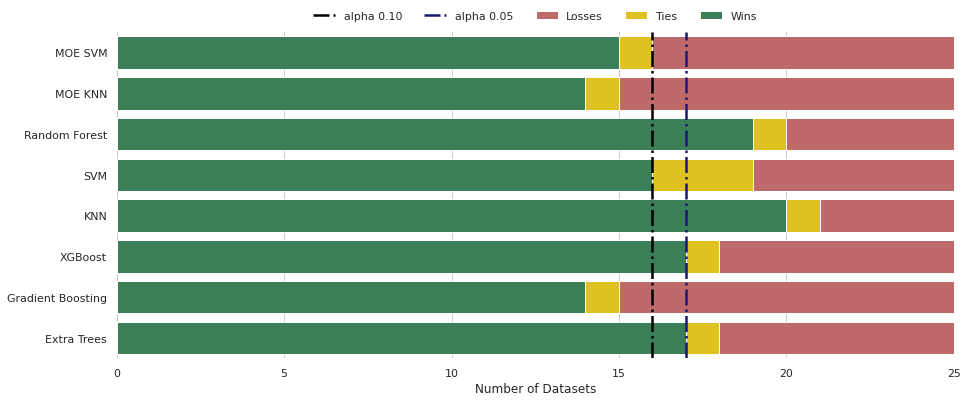

In [9]:
WinTieLoss(wtl_moe_dt_plot, leyend=True, saving_path='../figures/moe_dt_sing_test')

## MOE SVM Sing Test

In [10]:
wtl_moe_svm, wtl_moe_svm_plot = rank_df(df_mean, method='MOE SVM')

In [11]:
wtl_moe_svm

,Wins,Ties,Losses
MOE KNN,14,2,9
MOE DT,9,1,15
Random Forest,16,2,7
SVM,15,4,6
KNN,20,2,3
XGBoost,16,1,8
Gradient Boosting,15,2,8
Extra Trees,16,2,7


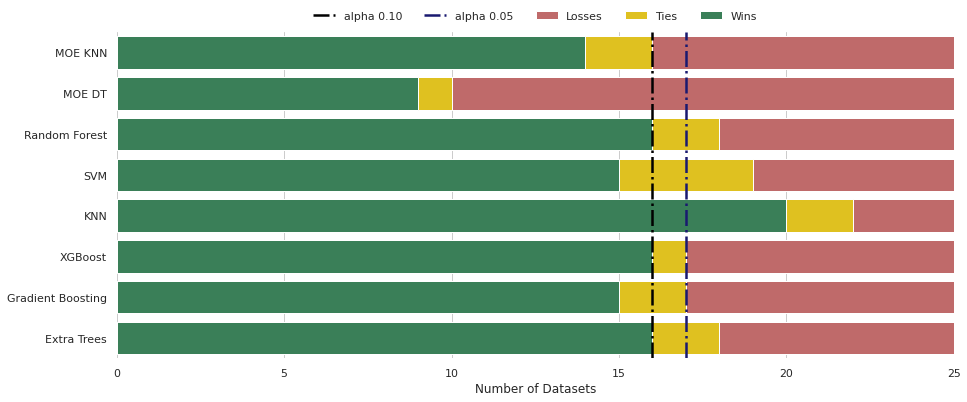

In [12]:
WinTieLoss(wtl_moe_svm_plot, leyend=True, saving_path='../figures/moe_svm_sing_test')

## MOE KNN Sing Test

In [13]:
wtl_moe_knn, wtl_moe_knn_plot = rank_df(df_mean, method='MOE KNN')

In [14]:
wtl_moe_knn

,Wins,Ties,Losses
MOE SVM,9,2,14
MOE DT,10,1,14
Random Forest,16,1,8
SVM,13,3,9
KNN,19,3,3
XGBoost,14,2,9
Gradient Boosting,13,2,10
Extra Trees,12,3,10


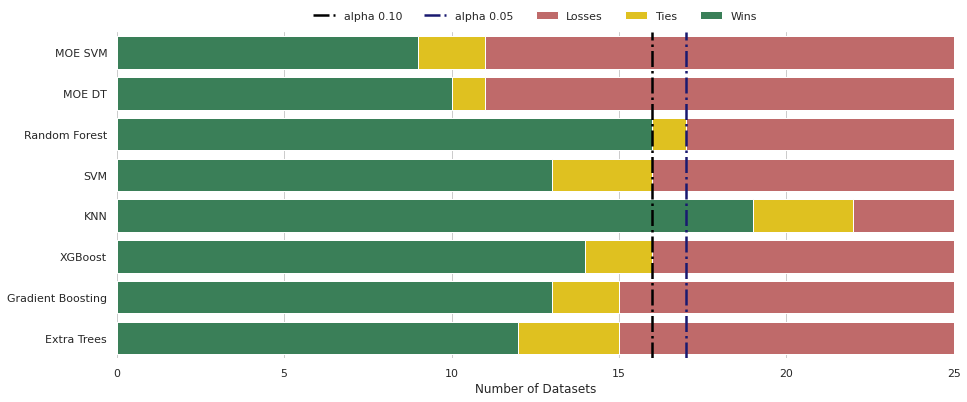

In [15]:
WinTieLoss(wtl_moe_knn_plot, leyend=True, saving_path='../figures/moe_knn_sing_test')